Assignment No.2
Name : Shivani Gaikwad
Roll No. 43315
Batch : P-11

### 1. Import the necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

### 2. Grab the MNIST Dataset

In [2]:
print("Accessing mnist...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# Flatten the images
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# convert labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.fit_transform(testY)

Accessing mnist...


### 3. Feed Forward Neural Network

In [3]:
model = Sequential()
model.add(Dense(256, input_shape = (784,), activation = "sigmoid"))
model.add(Dense(128, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

### 4. Adding SGD Optimizer and training 

In [4]:
# Adding optimizer
# Learning rate --> 0.01
sgd = SGD(0.01)

# Fitting and training
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 2.2860 - accuracy: 0.1898 - val_loss: 2.2463 - val_accuracy: 0.2754
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2150 - accuracy: 0.3730 - val_loss: 2.1778 - val_accuracy: 0.4909
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1346 - accuracy: 0.5112 - val_loss: 2.0810 - val_accuracy: 0.5353
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 2.0180 - accuracy: 0.5801 - val_loss: 1.9358 - val_accuracy: 0.6154
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 1.8491 - accuracy: 0.6244 - val_loss: 1.7371 - val_accuracy: 0.6659
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 1.6365 - accuracy: 0.6659 - val_loss: 1.5114 - val_accuracy: 0.6852
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 1.4193 - accuracy: 0.7042 - val_loss: 1.3049 - val_accuracy: 0.7183

Epoch 58/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3165 - accuracy: 0.9089 - val_loss: 0.3060 - val_accuracy: 0.9124
Epoch 59/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3148 - accuracy: 0.9096 - val_loss: 0.3044 - val_accuracy: 0.9121
Epoch 60/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3132 - accuracy: 0.9101 - val_loss: 0.3027 - val_accuracy: 0.9134
Epoch 61/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3115 - accuracy: 0.9103 - val_loss: 0.3015 - val_accuracy: 0.9135
Epoch 62/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3099 - accuracy: 0.9106 - val_loss: 0.2996 - val_accuracy: 0.9136
Epoch 63/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3085 - accuracy: 0.9113 - val_loss: 0.2988 - val_accuracy: 0.9141
Epoch 64/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3069 - accuracy: 0.9113 - val_loss: 0.2972 - val_accuracy:

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


### 5. Evaluating the model

In [6]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in le.classes_]))

79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.93      0.92     10000



### 6. Plotting training loss and accuracy

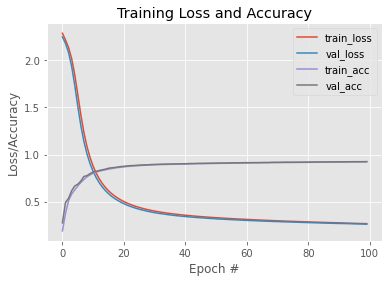

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()